# Bring in MTBS Dataset 

In [1]:
#!pip install descartes

In [2]:
#!pip install geopandas --upgrade

In [3]:
import matplotlib.pyplot as plt
import numpy as np 


from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes
import pandas as pd
import glob
import os
from functools import reduce
import seaborn as sns
import rasterio
import rasterio.plot
import rioxarray as rxr
import rioxarray as rxr

In [5]:
usa_counties = gpd.read_file("tl_2019_us_county/tl_2019_us_county.shp")

In [6]:
usa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


<AxesSubplot:>

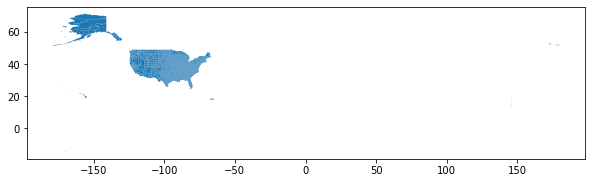

In [7]:
# magic command for using matplotlib, next plot state geometries
%matplotlib inline
usa_counties.plot(figsize=(10,10))

In [15]:
fires = gpd.read_file("Interagency_Fire_Perimeter_History_-_All_Years/InteragencyFirePerimeterHistory.shp")

In [17]:
pd.set_option('display.max_columns', None)
fires.head()

,FID,OBJECTID,MAP_METHOD,DATE_CUR,COMMENTS,GEO_ID,IRWINID,UNQE_FIRE_,FIRE_YEAR,LOCAL_NUM,INCIDENT,UNIT_ID,POO_RESP_I,FEATURE_CA,GIS_ACRES,USER_NAME,SOURCE,AGENCY,FIRE_YEAR_,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,GPS Ground,20200623,None,1,None,None,2020,00013212,NELSON,CANEU,None,Wildfire,109.602501,None,CalFire FRAP,CDF,2020.0,0.035733,0.000046,"POLYGON ((-121.34840 38.88999, -121.34835 38.8..."
1,2,2,GPS Ground,20200604,None,2,None,None,2020,00011799,AMORUSO,CANEU,None,Wildfire,685.585022,None,CalFire FRAP,CDF,2020.0,0.101178,0.000288,"POLYGON ((-121.35275 38.82038, -121.35267 38.8..."
2,3,3,GPS Ground,20200301,None,3,None,None,2020,00018493,ATHENS,CANEU,None,Wildfire,27.300480,None,CalFire FRAP,CDF,2020.0,0.017450,0.000011,"POLYGON ((-121.33333 38.84558, -121.33311 38.8..."
3,4,4,GPS Ground,20200401,None,4,None,None,2020,00007619,FLEMING,CANEU,None,Wildfire,12.931550,None,CalFire FRAP,CDF,2020.0,0.016557,0.000005,"POLYGON ((-121.27317 38.96308, -121.27304 38.9..."
4,5,5,GPS Ground,20200419,None,5,None,None,2020,00008471,MELANESE,CANEU,None,Wildfire,10.315960,None,CalFire FRAP,CDF,2020.0,0.010920,0.000004,"POLYGON ((-121.30065 39.48714, -121.30041 39.4..."


In [18]:
fires.columns

Index(['FID', 'OBJECTID', 'MAP_METHOD', 'DATE_CUR', 'COMMENTS', 'GEO_ID',
       'IRWINID', 'UNQE_FIRE_', 'FIRE_YEAR', 'LOCAL_NUM', 'INCIDENT',
       'UNIT_ID', 'POO_RESP_I', 'FEATURE_CA', 'GIS_ACRES', 'USER_NAME',
       'SOURCE', 'AGENCY', 'FIRE_YEAR_', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [19]:
fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
usa_counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [21]:
#from shapely.geometry import mapping

In [22]:
usa_fires_full = gpd.overlay(fires, usa_counties, how='intersection')

<ipython-input-22-444653056751>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  usa_fires_full = gpd.overlay(fires, usa_counties, how='intersection')
<ipython-input-22-444653056751>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  usa_fires_full = gpd.overlay(fires, usa_counties, how='intersection')


In [23]:
usa_fires_full['intersect_area'] = usa_fires_full.geometry.area

<ipython-input-23-ccd4fd2e4a39>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  usa_fires_full['intersect_area'] = usa_fires_full.geometry.area


In [24]:
usa_fires_full.head()

,FID,OBJECTID,MAP_METHOD,DATE_CUR,COMMENTS,GEO_ID,IRWINID,UNQE_FIRE_,FIRE_YEAR,LOCAL_NUM,INCIDENT,UNIT_ID,POO_RESP_I,FEATURE_CA,GIS_ACRES,USER_NAME,SOURCE,AGENCY,FIRE_YEAR_,SHAPE_Leng,SHAPE_Area,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,intersect_area
0,1,1,GPS Ground,20200623,None,1,None,None,2020,00013212,NELSON,CANEU,None,Wildfire,109.602501,None,CalFire FRAP,CDF,2020.0,0.035733,0.000046,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.34835 38.88999, -121.34830 38.8...",0.000046
1,2,2,GPS Ground,20200604,None,2,None,None,2020,00011799,AMORUSO,CANEU,None,Wildfire,685.585022,None,CalFire FRAP,CDF,2020.0,0.101178,0.000288,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.35267 38.82031, -121.35264 38.8...",0.000288
2,3,3,GPS Ground,20200301,None,3,None,None,2020,00018493,ATHENS,CANEU,None,Wildfire,27.300480,None,CalFire FRAP,CDF,2020.0,0.017450,0.000011,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.33311 38.84563, -121.33289 38.8...",0.000011
3,4,4,GPS Ground,20200401,None,4,None,None,2020,00007619,FLEMING,CANEU,None,Wildfire,12.931550,None,CalFire FRAP,CDF,2020.0,0.016557,0.000005,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.27304 38.96313, -121.27292 38.9...",0.000005
4,6,6,GPS Ground,20200705,None,6,None,None,2020,00014858,PFE,CANEU,None,Wildfire,36.701931,None,CalFire FRAP,CDF,2020.0,0.024267,0.000015,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.38241 38.72944, -121.38237 38.7...",0.000015


In [25]:
usa_fires_full['total_area'] = usa_fires_full['ALAND'] + usa_fires_full['AWATER']

In [26]:
usa_fires_full['intersect_area_prop'] = usa_fires_full['intersect_area']/usa_fires_full['total_area']

In [27]:
usa_fires_full['approx_county_acres_burned'] = usa_fires_full['GIS_ACRES'] * usa_fires_full['intersect_area_prop']

In [28]:
usa_fires_full.columns

# 'Event_ID'
# 'irwinID'
# 'Incid_Name' - Name of fire (UNNAMED if not identifiable from source fire occurrence databases).
# 'Incid_Type' - Documented type of fire (WF: Wildfire, Rx: Prescribed Fire; UNK:Unknown).
# 'Map_ID'
# 'Map_Prog' - Mapping program/protocol the fire was mapped with.
# 'Asmnt_Type' - Fire mapping assessment label (Initial (SS) (SS=single scene), Initial, Extended, Extended (SS) (SS=single scene), Emergency, or Emergency (SS)).
# 'BurnBndAc' - Number of acres mapped.
# 'BurnBndLat' - Latitude of the mapped centroid of fire perimeter. 
# 'BurnBndLon' - Longitude of the mapped centroid of fire perimeter. 
# 'Ig_Date' - Date of fire ignition (from source fire occurrence databases).
# 'Pre_ID' - Landsat or Sentinel pre scene ID. 
# 'Post_ID'- Landsat or Sentinel post scene ID. 
# 'Perim_ID' - Landsat or Sentinel perimeter scene ID. Used to help delinate perimeter of an Extended or Extended (SS) assessment. Not always utilized sometimes field will be populated, others not.
# 'dNBR_offst' - The mean dNBR value sampled from an unburned area outside the fire perimeter.  # # 'dNBR_stdDv' - The standard deviation of the mean dNBR value sampled from an unburned area outside the fire perimeter. 
# 'NoData_T' - No data threshold (in dNBR index values; NBR index units for single scene assessments).
# 'IncGreen_T' - Increased greenness threshold (in dNBR index values; NBR index units for single scene assessments).
# 'Low_T' - Unburned/Low threshold (in dNBR index values; NBR index units for single scene assessments). 
# 'Mod_T' - Low/Moderate burn severity threshold (in dNBR index values; NBR index units for single scene assessments).
# 'High_T' - Moderate/High burn severity threshold (in dNBR index values; NBR index units for single scene assessments).
# 'Comment' - As needed comments or notes provided by the mapping analyst to the end user.



# Burn Severity – A qualitative assessment of the heat pulse directed toward the ground during a fire. Burn severity relates to soil heating, large fuel and duff consumption, consumption of the litter and organic layer beneath trees and isolated shrubs, and mortality of buried plant parts.
# Burned Area Boundary – The boundary defining the area burned by a fire. In the context of satellite-based post-fire burn severity mapping, burned areas are typically delineated using remote sensing indices and/or spectral data, and may include unburned “island” areas.
# Differenced Normalized Burn Ratio (dNBR) – A differenced NBR image, or change image, created where the post-fire NBR is subtracted from the pre-fire NBR. The dNBR may be used to discriminate burned from unburned areas and identify vegetation burn severity classes. The dNBR is calculated as: dNBR = NBR pre-fire – NBR post-fire
# Increased Greenness – A discrete burn severity class identified when thresholding dNBR data for Monitoring Trends in Burn Severity assessments. It typically represents areas that burned but display more vegetation cover, density, and/or productivity, usually within one growing season after fire. This is a fire-caused effect from release of nutrients into soil, and/or reduced competition for nutrients, light and water. These areas are usually herbaceous or low shrub communities that undergo little change in species composition after fire.


# High Burn Severity – A discrete burn severity class identified when thresholding dNBR data for Burned Area Emergency Response or Monitoring Trends in Burn Severity assessments, dNDVI for BAER assessments or RdNBR data for Rapid Assessment of Vegetation Condition after Wildfire assessments. In forested ecosystems, it typically represents areas affected by fire where: Substrates, litter is totally consumed; duff is typically nearly entirely consumed; Medium and heavy woody debris are at least partially consumed and at least deeply charred with mostly ash and charcoal remaining; Overstory trees typically exhibit greater than 75 percent mortality; Crown char is typically 100 percent from torching fire, and significant branch loss is present at the highest crown levels. In grassland and shrubland ecosystems, it typically represents areas affected by fire where: Over half of the site exhibits over 50 percent cover of newly exposed mineral soil or rock fragments; Herbaceous plants and shrubs are almost completely charred or consumed above ground, often with notable branch loss on taller shrubs; Resprouting from perennial plants, except grasses, is strongly reduced.

# Low Burn Severity – A discrete burn severity class identified when thresholding dNBR data for Burned Area Emergency Response or Monitoring Trends in Burn Severity assessments, dNDVI for Burned Area Emergency Response assessments or RdNBR data for Rapid Assessment of Vegetation Condition after Wildfire assessments. It includes areas where more than a small proportion of the site burned.  All vegetation strata are slightly altered from the pre-fire state, but some may show pronounced burn effects. In forested ecosystems, it typically represents areas affected by fire where: Substrates, litter often exhibits fairly high consumption (up to 100 percent). Duff, woody debris and newly exposed mineral soil typically exhibit some change. Low vegetation (<1 meter) and shrubs or trees (1-5 meters) may show significant aboveground scorch, char or consumption, and vegetation density or cover may be greatly altered. Intermediate and large overstory trees may exhibit up to 25 percent mortality evidenced by crown char or scorch. Char height from ground flames is typically less than 3 meters.

# Moderate Burn Severity – A discrete burn severity class identified when thresholding dNBR data for Burned Area Emergency Response or Monitoring Trends in Burn Severity (MTBS) assessments, dNDVI for Burned Area Emergency Response assessments or RdNBR data for Rapid Assessment of Vegetation Condition after Wildfire assessments. It includes areas that exhibit conditions that are transitional in magnitude and/or uniformity between characteristics within low and high burn severity classes.

# Normalized Burn Ratio (NBR) – A normalized index that leverages the contrast in response by the near-infrared (NIR) and short-wave infrared (SWIR) bands to leaf area, plant productivity and moisture. Healthy, green vegetation has a high reflection of NIR light and strongly absorbs SWIR light resulting in high NBR values. Increasing damage to vegetation by fire and the exposure of dry, rocky soils results in low NBR values. NBR is calculated for each pre-fire and post-fire scene as: NBR = (NIR - SWIR) ÷ (NIR + SWIR)

# Prescribed Fire – Any fire ignited by management actions to meet specific objectives (NWCG Glossary of Wildland Fire Terminology).

Index(['FID', 'OBJECTID', 'MAP_METHOD', 'DATE_CUR', 'COMMENTS', 'GEO_ID',
       'IRWINID', 'UNQE_FIRE_', 'FIRE_YEAR', 'LOCAL_NUM', 'INCIDENT',
       'UNIT_ID', 'POO_RESP_I', 'FEATURE_CA', 'GIS_ACRES', 'USER_NAME',
       'SOURCE', 'AGENCY', 'FIRE_YEAR_', 'SHAPE_Leng', 'SHAPE_Area', 'STATEFP',
       'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP',
       'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry', 'intersect_area', 'total_area',
       'intersect_area_prop', 'approx_county_acres_burned'],
      dtype='object')

In [29]:
usa_fires_full.to_csv('us_fires_full_all_full_history.csv', index=False, encoding = "utf_8_sig")

In [37]:
# create pandas dataframe object with states and fire count
counts_per_county = usa_fires_full.groupby('NAME').size()    
# list highest values first 
#counts_per_county.sort_values(axis=0, ascending=False)

In [38]:
# add values to the original shapefile data as a new field
usa_counties_collapsed= usa_counties.merge(counts_per_county.reset_index(name='number_of_fires'))        
# list first five rows of shapefile
usa_counties_collapsed.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,number_of_fires
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694583,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2
1,35,051,01702370,35051,Sierra,Sierra County,06,H1,G4020,None,None,None,A,10829248654,147675972,+33.1194684,-107.1881612,"POLYGON ((-107.24564 33.47797, -107.24013 33.4...",2
2,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,None,None,A,1564251834,5285207,+33.2703999,-085.8635254,"POLYGON ((-85.97879 33.32757, -85.97876 33.328...",3
3,48,077,01383824,48077,Clay,Clay County,06,H1,G4020,None,48660,None,A,2819870186,72508536,+33.7859042,-098.2129174,"POLYGON ((-98.42308 33.94453, -98.42308 33.944...",3
4,17,025,00424214,17025,Clay,Clay County,06,H1,G4020,None,None,None,A,1212815740,3271820,+38.7468187,-088.4823254,"POLYGON ((-88.69517 38.82630, -88.69516 38.826...",3


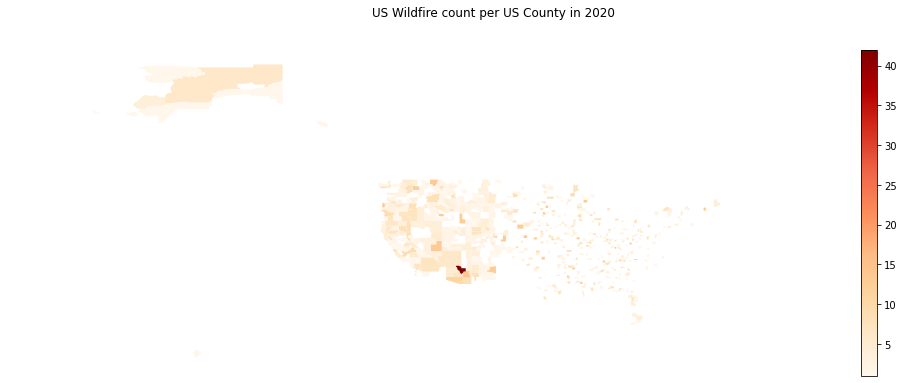

In [39]:
# same map, but without x and y axes and added title
f, ax = plt.subplots(1, figsize=(18,6))
ax = usa_counties_collapsed.plot(column='number_of_fires', cmap='OrRd', legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire count per US County in 2020')     
ax.set_axis_off()
plt.show()